In this notebook, we analyze the collected 19 liverwort samples, and use the voronoi tests to see if the relationship between the water pore and cell chambers are voronoi or not.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# from shapely.geometry import Polygon 
from scipy.spatial import Voronoi
from statannot import add_stat_annotation

import sys
sys.path.insert(0, '../')
import graph_create, voronoi_local, jaccard_similarity, center_predict

In [3]:
def melt_df(df):
    df['sample'] = df.index
    df = df.melt(id_vars= 'sample', var_name='type', value_name='error')
    return df

In [4]:
def plot_theme_color(df, test):

    'we simply do boxplot for data with no mixed effects'

    colors = ['orange','red', 'deeppink', 'purple']
    x = 'type'
    y = 'error'
    order = ['hydathode', 'centroid', 'mid-point', 'random']
    # Set custom color palette
    sns.set_palette(sns.color_palette(colors))

    fig, ax = plt.subplots(figsize = (6,6))
    ax = sns.boxplot (x = x, y = y, data = df, order = order, width = .5)


    ax, test_results = add_stat_annotation(ax, data = df, x=x, y=y, order = order,
                        box_pairs = [('hydathode', 'centroid'), ('hydathode', 'mid-point'), ('hydathode', 'random')],
                        test='t-test_paired',  
                        text_format='star', 
                        loc='inside', 
                        verbose=2)

    ax.set_title(f'{test}_error', fontsize = 15)
    ax.set_xlabel('point sets', fontsize = 14)

    plt.show()

In [5]:
dot_folder = f'../data/liverwort/Hydathodes'
vein_folder = f'../data/liverwort/Veins'

In [6]:
# manually created the sample list since it's numbered
sample_list = list(range(1, 13))
sample_list.extend(list(range(14, 18)))
sample_list.extend(list(range(19, 22)))

-----
### 1. Local test (Voronoi I):

In [7]:
def local_error(sample, dot_folder, vein_folder):
    G = graph_create.graph_creation(sample, dot_folder, vein_folder)
    
    print('Perform local tests... \n')
    # local tests:
    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
    rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)

    # baseline local tests:
    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)    
    centroid_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat, cent_in_faces)
    midpoint_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat ,mid_in_faces)
    random_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat, rand_in_faces)

    G_dual = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])

    baseline_summary = pd.DataFrame(np.array([rst[2].iloc[0].tolist(), centroid_rst[2].iloc[0].tolist(), midpoint_rst[2].iloc[0].tolist(), random_rst[2].iloc[0].tolist()]), 
                                    columns = ['angle_mean', 'angle_std', 'dist_mean', 'dist_std'],
                                    index = ['dot', 'centroid', 'midpoint','random'])

    angle_list = [baseline_summary['angle_mean'][0],
                        baseline_summary['angle_mean'][1],
                        baseline_summary['angle_mean'][2],
                        baseline_summary['angle_mean'][3]]

    dist_list = [baseline_summary['dist_mean'][0],
                        baseline_summary['dist_mean'][1],
                        baseline_summary['dist_mean'][2],
                        baseline_summary['dist_mean'][3]]

    print('Local tests done! \n')

    return angle_list, dist_list

In [8]:
angle_mean_arr = np.zeros([len(sample_list),4])
dist_mean_arr = np.zeros([len(sample_list),4])

for i, sample in enumerate(sample_list):
    print('------------- running sample: ', sample, '-------------------')
    angle_list, dist_list = local_error(sample, dot_folder, vein_folder)
    angle_mean_arr[i] = angle_list
    dist_mean_arr[i] = dist_list

angle_mean_df = melt_df(pd.DataFrame(angle_mean_arr, index = sample_list, columns = ['hydathode','centroid','mid-point','random']))
dist_mean_df = melt_df(pd.DataFrame(dist_mean_arr, index = sample_list, columns = ['hydathode','centroid','mid-point','random']))



------------- running sample:  1 -------------------
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

------------- running sample:  2 -------------------
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

------------- running sample:  3 -------------------
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

------------- running sample:  4 -------

../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Perform local tests... 

Local tests done! 

------------- running sample:  14 -------------------
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

------------- running sample:  15 -------------------
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

------------- running sample:  16 -------------------
Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform lo

#### Liverwort pores perform worse than centroid!

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: t-test paired samples with Bonferroni correction, P_val=6.470e-02 stat=2.516e+00
hydathode v.s. mid-point: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-6.814e-01
hydathode v.s. random: t-test paired samples with Bonferroni correction, P_val=1.465e-05 stat=-6.414e+00


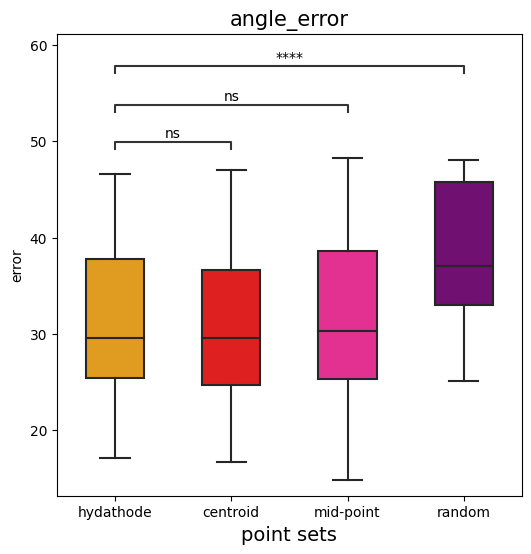

In [17]:
plot_theme_color(angle_mean_df, test = 'angle') 

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: t-test paired samples with Bonferroni correction, P_val=3.012e-08 stat=9.924e+00
hydathode v.s. mid-point: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-3.337e-01
hydathode v.s. random: t-test paired samples with Bonferroni correction, P_val=2.722e-17 stat=-3.393e+01


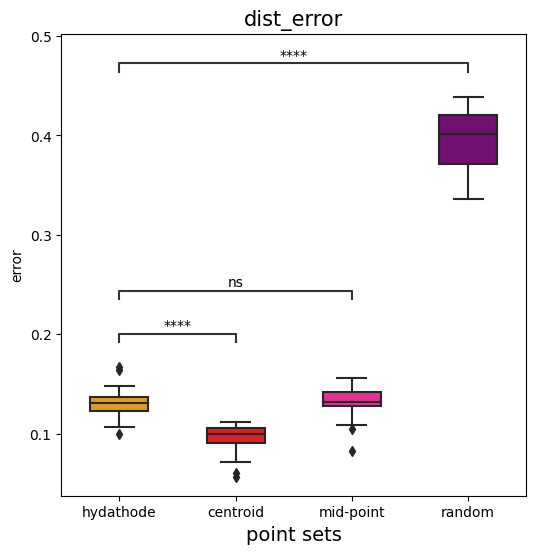

In [18]:
plot_theme_color(dist_mean_df, test = 'dist') 

#### Visualize pores and centroid:

In [19]:
import figure_plot

In [20]:
# plot an example! 
G = graph_create.graph_creation(sample, dot_folder, vein_folder)
    
print('Perform local tests... \n')
# local tests:
adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)

# baseline local tests:
cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)    
centroid_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat, cent_in_faces)
midpoint_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat ,mid_in_faces)
random_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat, rand_in_faces)
G_dual = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])


Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 



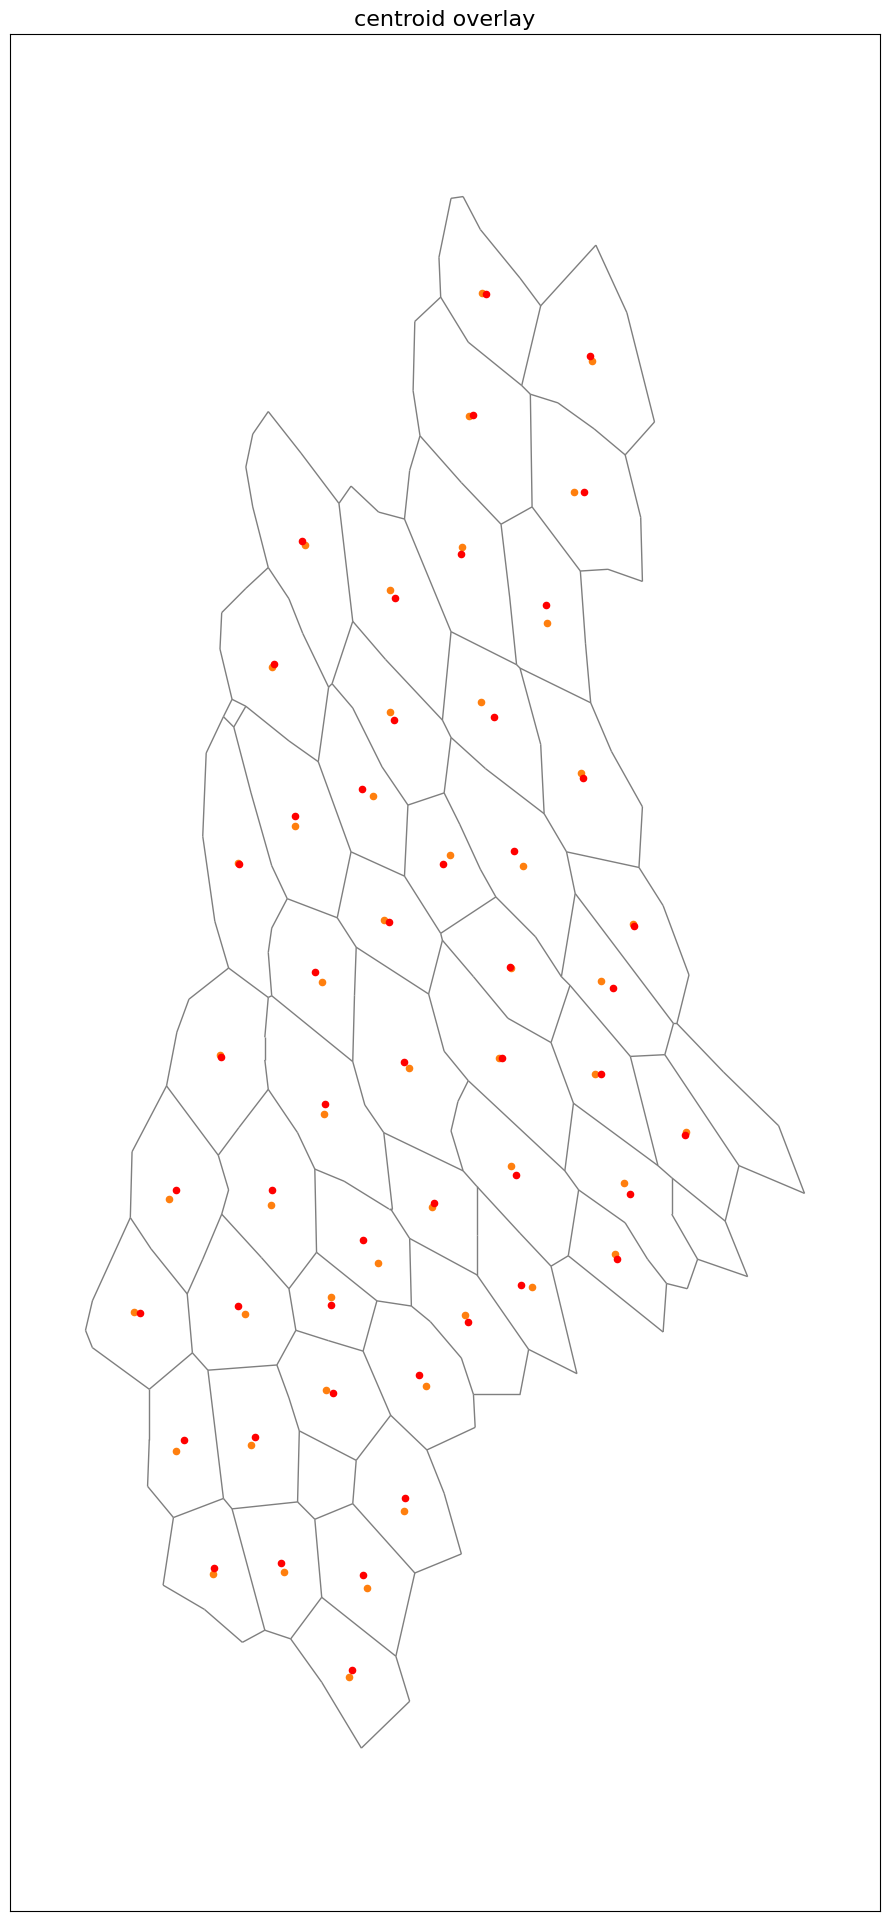

In [22]:
plt.style.use("default")
figure_plot.plot_baseline(G, G_dual, pt_type = 'centroid')

----
### 2. Overlap test (Voronoi II):

In [11]:
J_mean_arr = np.zeros([len(sample_list),4])

In [12]:
def spatial_overlap(sample):
    
    G = graph_create.graph_creation(sample, dot_folder= dot_folder, vein_folder= vein_folder)

    seeds = [n for n in G.nodes if G.nodes[n]['type'] != 'vein']
    vor = Voronoi(seeds)
    bounded_regions = jaccard_similarity.bounded_polygons(G, vor)
    J_list = jaccard_similarity.overlap_test(G, seeds, bounded_regions)

    print()
    print(f'start area test for {sample}  \n')


    centroid_seeds, midpoint_seeds, random_seeds = jaccard_similarity.hybrid_seeds(G)

    centroid_vor = Voronoi(centroid_seeds)
    midpoint_vor =  Voronoi(midpoint_seeds)
    random_vor = Voronoi(random_seeds)

    centroid_bounded_regions = jaccard_similarity.bounded_polygons(G, centroid_vor)
    midpoint_bounded_regions = jaccard_similarity.bounded_polygons(G, midpoint_vor)
    random_bounded_regions = jaccard_similarity.bounded_polygons(G, random_vor)

    centroid_J_list = jaccard_similarity.overlap_test(G, seeds, centroid_bounded_regions)
    midpoint_J_list = jaccard_similarity.overlap_test(G, seeds, midpoint_bounded_regions)
    random_J_list = jaccard_similarity.overlap_test(G, seeds, random_bounded_regions)

    print(f'Finish area test. \n')
    
    return np.nanmean(J_list), np.nanmean(centroid_J_list), np.nanmean(midpoint_J_list), np.nanmean(random_J_list)

    


In [13]:
for i, sample in enumerate(sample_list): 
    J_mean_arr[i] = spatial_overlap(sample)

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

One multipolygon generated...

start area test for 1  

One multipolygon generated...
One multipolygon generated...
Finish area test. 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.


start area test for 2  

One multipolygon generated...
One multipolygon generated...
One multipolygon generated...
Finish area test. 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

One multipolygon generated...

start area test for 3  

One mu

In [15]:
J_df = melt_df(pd.DataFrame(J_mean_arr, index = sample_list, columns = ['hydathode','centroid','mid-point','random']))

In [16]:
J_df.describe()

,sample,error
count,76.000000,76.000000
mean,10.526316,0.587945
std,6.165438,0.107602
min,1.000000,0.382660
25%,5.000000,0.521363
50%,10.000000,0.613905
75%,16.000000,0.679078
max,21.000000,0.755377


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: t-test paired samples with Bonferroni correction, P_val=6.758e-09 stat=-1.092e+01
hydathode v.s. mid-point: t-test paired samples with Bonferroni correction, P_val=2.016e-03 stat=4.100e+00
hydathode v.s. random: t-test paired samples with Bonferroni correction, P_val=2.881e-15 stat=2.606e+01


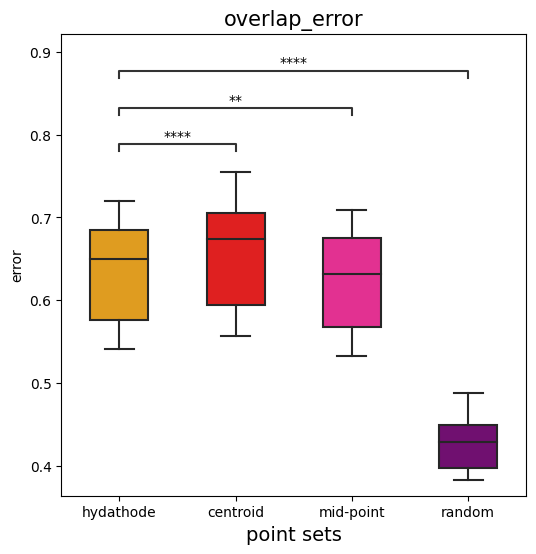

In [17]:
plot_theme_color(J_df, test = 'overlap') 

----

### 3. center prediction (Voronoi III)

In [18]:
import center_predict, voronoi_local, figure_plot

In [19]:
def center_error(sample):

    print(f'Predict center for {sample}  \n')

    G = graph_create.graph_creation(sample, dot_folder, vein_folder)

    # local tests:
    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)

    s_list, b_list = center_predict.slope_intercept(shared_edges_mat, adj_faces_mat)

    num_dot = len(G.graph['dots_passed'])

    predicted_centers = center_predict.solve_lin_system(s_list, b_list, num_dot)

    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)  

    # errors:
    mean_dist = center_predict.mean_err(predicted_centers, G.graph['dots_passed'])
    cent_dist = center_predict.mean_err(predicted_centers, cent_in_faces)
    mid_dist = center_predict.mean_err(predicted_centers, mid_in_faces)
    rand_dist = center_predict.mean_err(predicted_centers, rand_in_faces)
    
    print(f'Center prediction done. \n')
    
    return mean_dist, cent_dist, mid_dist, rand_dist

In [20]:
predict_err_arr = np.zeros([len(sample_list),4]) 

for i, sample in enumerate(sample_list):
    predict_err_arr[i] = center_error(sample)

Predict center for 1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for 14  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 15  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 16  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for 17  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph.

In [21]:
pred_err_df = pd.DataFrame(predict_err_arr, index = sample_list, columns = ['hydathode','centroid','mid-point','random'])

In [22]:
pred_err_df = melt_df(pred_err_df)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-6.690e-01
hydathode v.s. mid-point: t-test paired samples with Bonferroni correction, P_val=6.696e-02 stat=-2.500e+00
hydathode v.s. random: t-test paired samples with Bonferroni correction, P_val=3.586e-03 stat=-3.842e+00


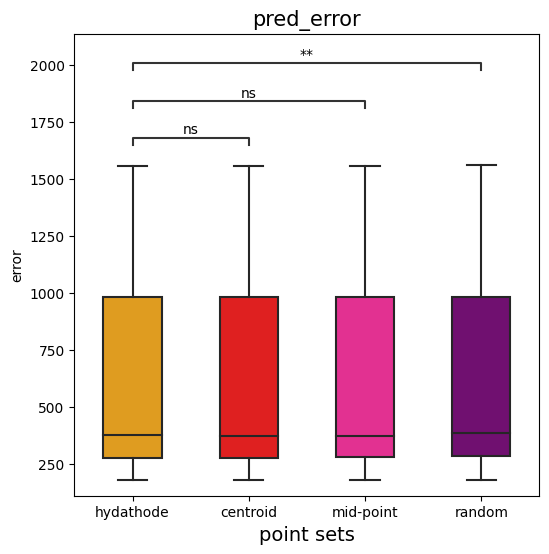

In [23]:
plot_theme_color(pred_err_df, test = 'pred') 